<a href="https://colab.research.google.com/github/johanrizky/PredictiveAnalytics/blob/main/Model/Proyek_Pertama_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laporan Proyek Machine Learning - Johan Rizky Triosaputra

##1# Data Loading

In [ ]:
# Mengimpor library visualisasi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Library Data Preparation
from sklearn.preprocessing import  OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Library Model Development
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Libary Evaluasi Model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [ ]:
car = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ford.csv')
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


##2# Exploratory Data Analysis

###a# Deskripsi Variabel

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


###b# Menangani Missing Value

######
pajak tidak mungkin 0.
engineSize untuk mobil tidak mungkin dibawah 1.

In [ ]:
tax = (car.tax == 0).sum()
engineSize = (car.engineSize < 1).sum()

print("Nilai 0 di kolom tax ada: ", tax)
print("Nilai 0 di kolom engineSize ada: ", engineSize)

Nilai 0 di kolom tax ada:  2153
Nilai 0 di kolom engineSize ada:  51


In [ ]:
car.loc[(car['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12,Fiesta,2017,11000,Manual,20978,Petrol,0,65.7,1.0
24,Fiesta,2014,6795,Manual,35299,Petrol,0,65.7,1.0
27,Fiesta,2015,8299,Manual,25935,Petrol,0,65.7,1.0
30,Fiesta,2016,7999,Manual,60730,Diesel,0,78.5,1.5
33,Fiesta,2013,7236,Manual,39090,Petrol,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
17877,Fiesta,2015,6900,Manual,37000,Petrol,0,65.7,1.0
17938,Fiesta,2015,8499,Manual,9264,Petrol,0,65.7,1.0
17942,Focus,2015,8000,Manual,65000,Diesel,0,74.3,1.5
17946,Fiesta,2015,8999,Manual,24546,Petrol,0,65.7,1.0


In [ ]:
# Drop baris dengan nilai 'tax' dan 'engineSize' = 0
car = car.loc[(car[['tax', 'engineSize']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
car.shape

(15768, 9)

In [ ]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000
mean,2017.028602,12765.737633,22119.684044,128.773465,56.318981,1.374315
std,2.087788,4822.466547,19286.946428,48.811997,9.492793,0.441695
min,1996.000000,495.000000,1.000000,20.000000,20.800000,1.000000
25%,2016.000000,9545.750000,9247.000000,145.000000,51.400000,1.000000
50%,2017.000000,11995.000000,16821.000000,145.000000,57.700000,1.200000
75%,2018.000000,15899.000000,29470.250000,145.000000,62.800000,1.600000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


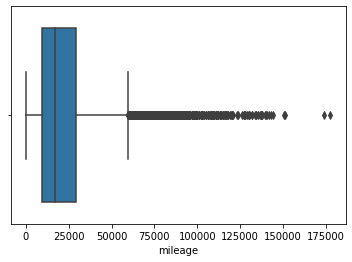

In [ ]:
sns.boxplot(x=car['mileage'])

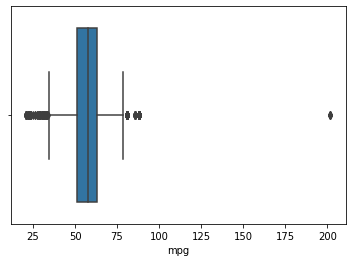

In [ ]:
sns.boxplot(x=car['mpg'])

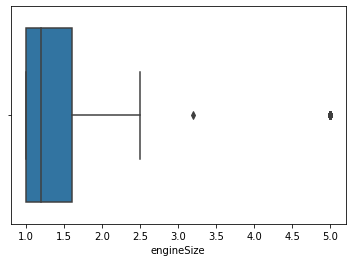

In [ ]:
sns.boxplot(x=car['engineSize'])

In [ ]:
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR=Q3-Q1
car=car[~((car<(Q1-1.5*IQR))|(car>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
car.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(8401, 9)

In [ ]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,8401.000000,8401.000000,8401.000000,8401.0,8401.000000,8401.000000
mean,2017.970956,13980.202357,14662.165337,145.0,56.836519,1.296393
std,1.031695,3752.915835,10590.909231,0.0,8.472447,0.385629
min,2013.000000,5298.000000,1.000000,145.0,34.400000,1.000000
25%,2017.000000,10979.000000,6961.000000,145.0,51.400000,1.000000
50%,2018.000000,13500.000000,12500.000000,145.0,57.700000,1.000000
75%,2019.000000,16800.000000,20000.000000,145.0,64.200000,1.500000
max,2020.000000,25400.000000,59701.000000,145.0,78.500000,2.300000


###c# Univariate Analysis

In [ ]:
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

Categorical Features

                        jumlah sampel  persentase
 Fiesta                          3122        37.2
 Focus                           2327        27.7
 Kuga                            1230        14.6
 EcoSport                         587         7.0
 Ka+                              407         4.8
 Mondeo                           154         1.8
 S-MAX                            102         1.2
 C-MAX                             86         1.0
 B-MAX                             84         1.0
 Galaxy                            78         0.9
 Puma                              60         0.7
 Edge                              47         0.6
 Grand C-MAX                       45         0.5
 Grand Tourneo Connect             24         0.3
 KA                                19         0.2
 Tourneo Custom                    15         0.2
 Tourneo Connect                   13         0.2
 Mustang                            1         0.0


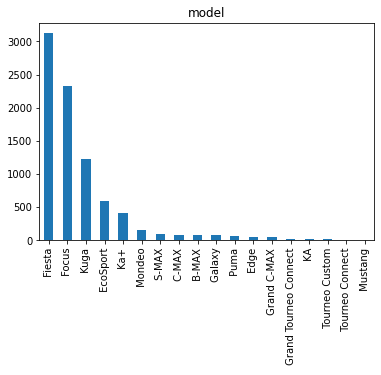

In [ ]:
feature = categorical_features[0]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
Manual              7290        86.8
Automatic            639         7.6
Semi-Auto            472         5.6


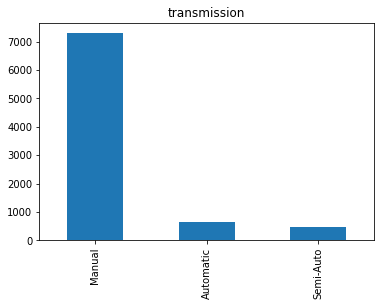

In [ ]:
feature = categorical_features[1]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

        jumlah sampel  persentase
Petrol           6243        74.3
Diesel           2156        25.7
Hybrid              2         0.0


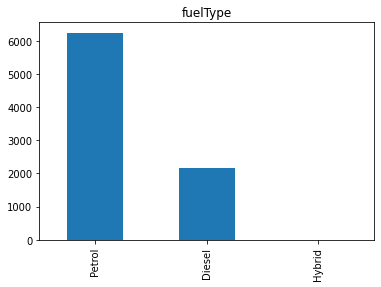

In [ ]:
feature = categorical_features[2]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Numerical Features

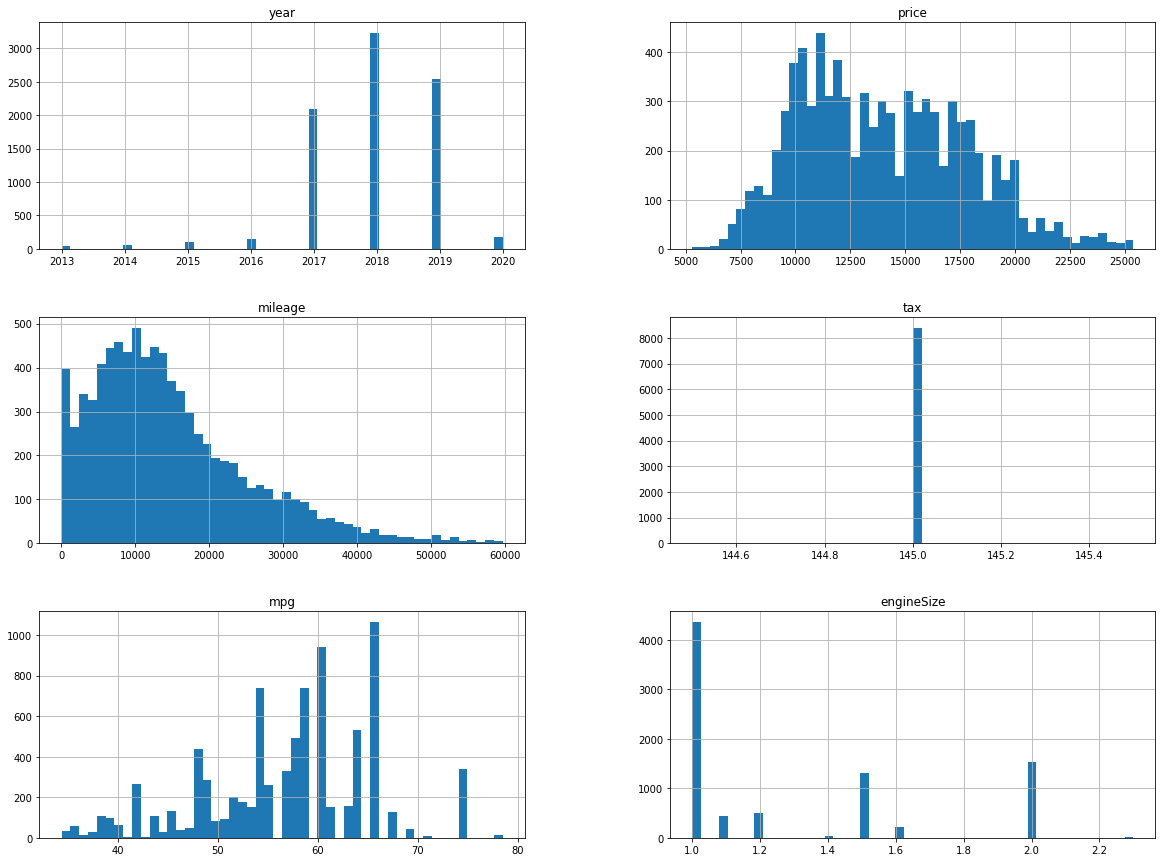

In [ ]:
car.hist(bins=50, figsize=(20,15))
plt.show()

###d# Multivariate Analysis
Categorical Features

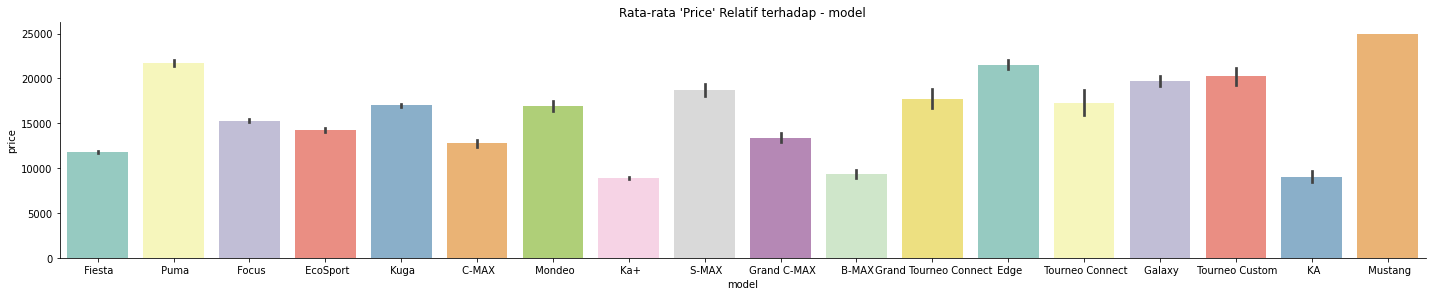

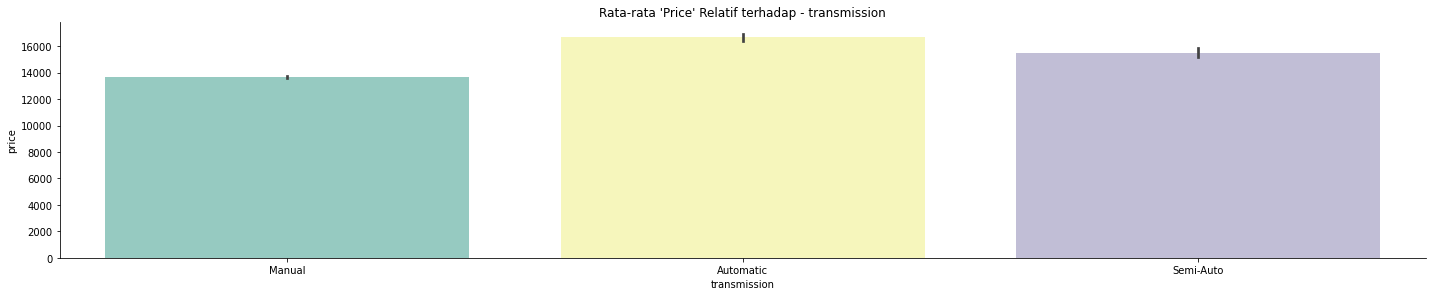

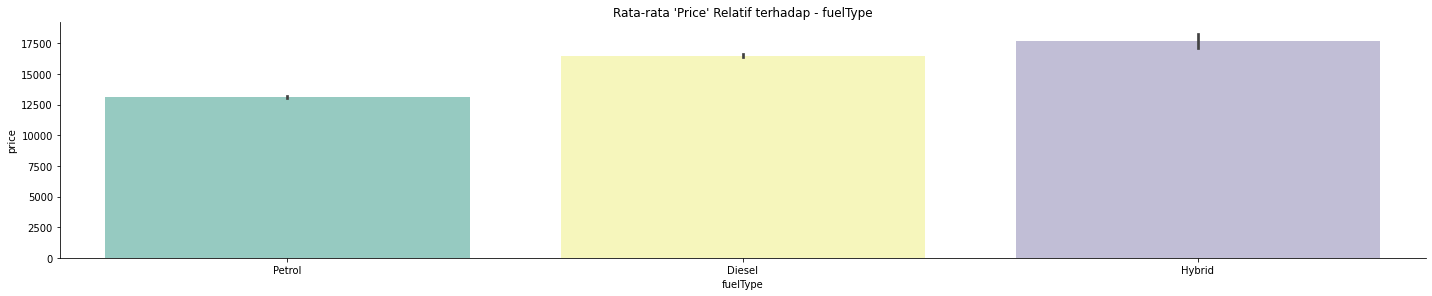

In [ ]:
car_features = car.select_dtypes(include='object').columns.to_list()
 
for col in car_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 5,  data=car, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

Numerical Features

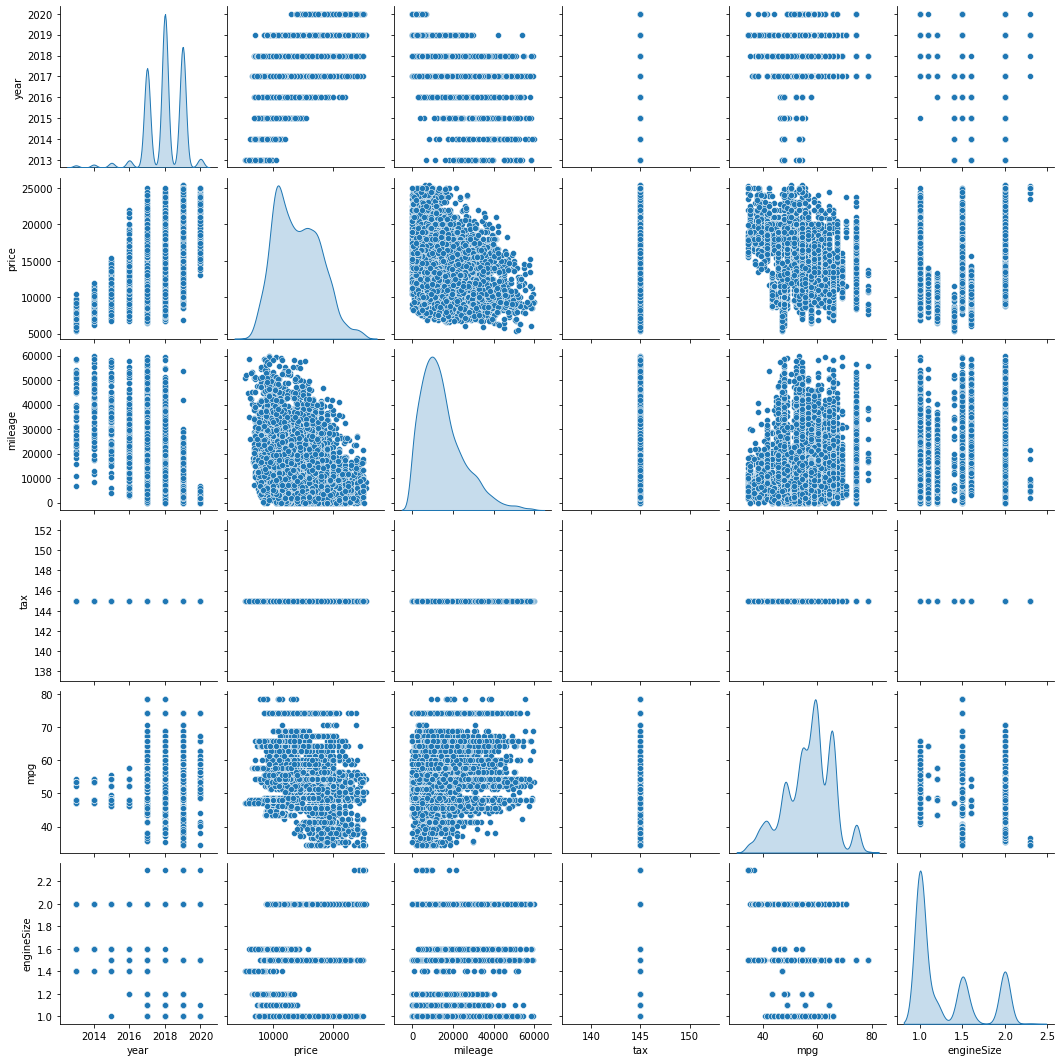

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(car, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

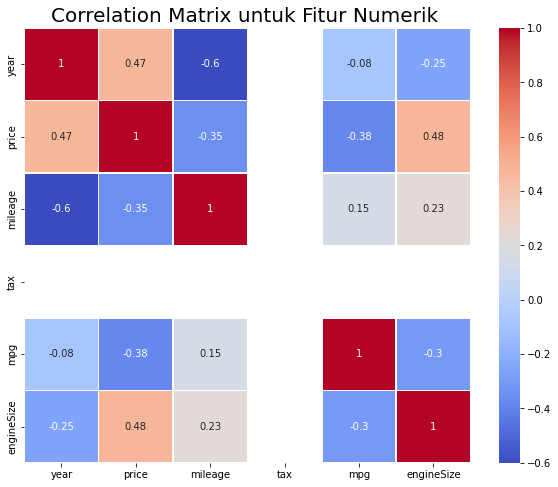

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = car.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
# memiliki korelasi yang sangat kecil (0.01). 
# Sehingga, fitur tersebut dapat di-drop.

car.drop(['tax'], inplace=True, axis=1)
car.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2


##3# Data Preparation

###a# Encoding Fitur Kategori

In [ ]:
car = pd.concat([car, pd.get_dummies(car['model'], prefix='model')],axis=1)
car = pd.concat([car, pd.get_dummies(car['transmission'], prefix='transmission')],axis=1)
car = pd.concat([car, pd.get_dummies(car['fuelType'], prefix='fuelType')],axis=1)
car.drop(['model','transmission','fuelType'], axis=1, inplace=True)
car.head()

,year,price,mileage,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,...,model_ Puma,model_ S-MAX,model_ Tourneo Connect,model_ Tourneo Custom,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
3,2019,17500,10460,40.3,1.5,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,2019,16500,1482,48.7,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,2015,10500,35432,47.9,1.6,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,2019,22500,2029,50.4,1.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
7,2017,9000,13054,54.3,1.2,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


**Visualisasi korelasi tipe model mobil beserta fitur- fitur dalam mobil terhadap harga mobil**

Text(0.5, 1.0, 'Cek Correlation Matrix untuk Fitur price dengan model, transmission, dan fuelType')

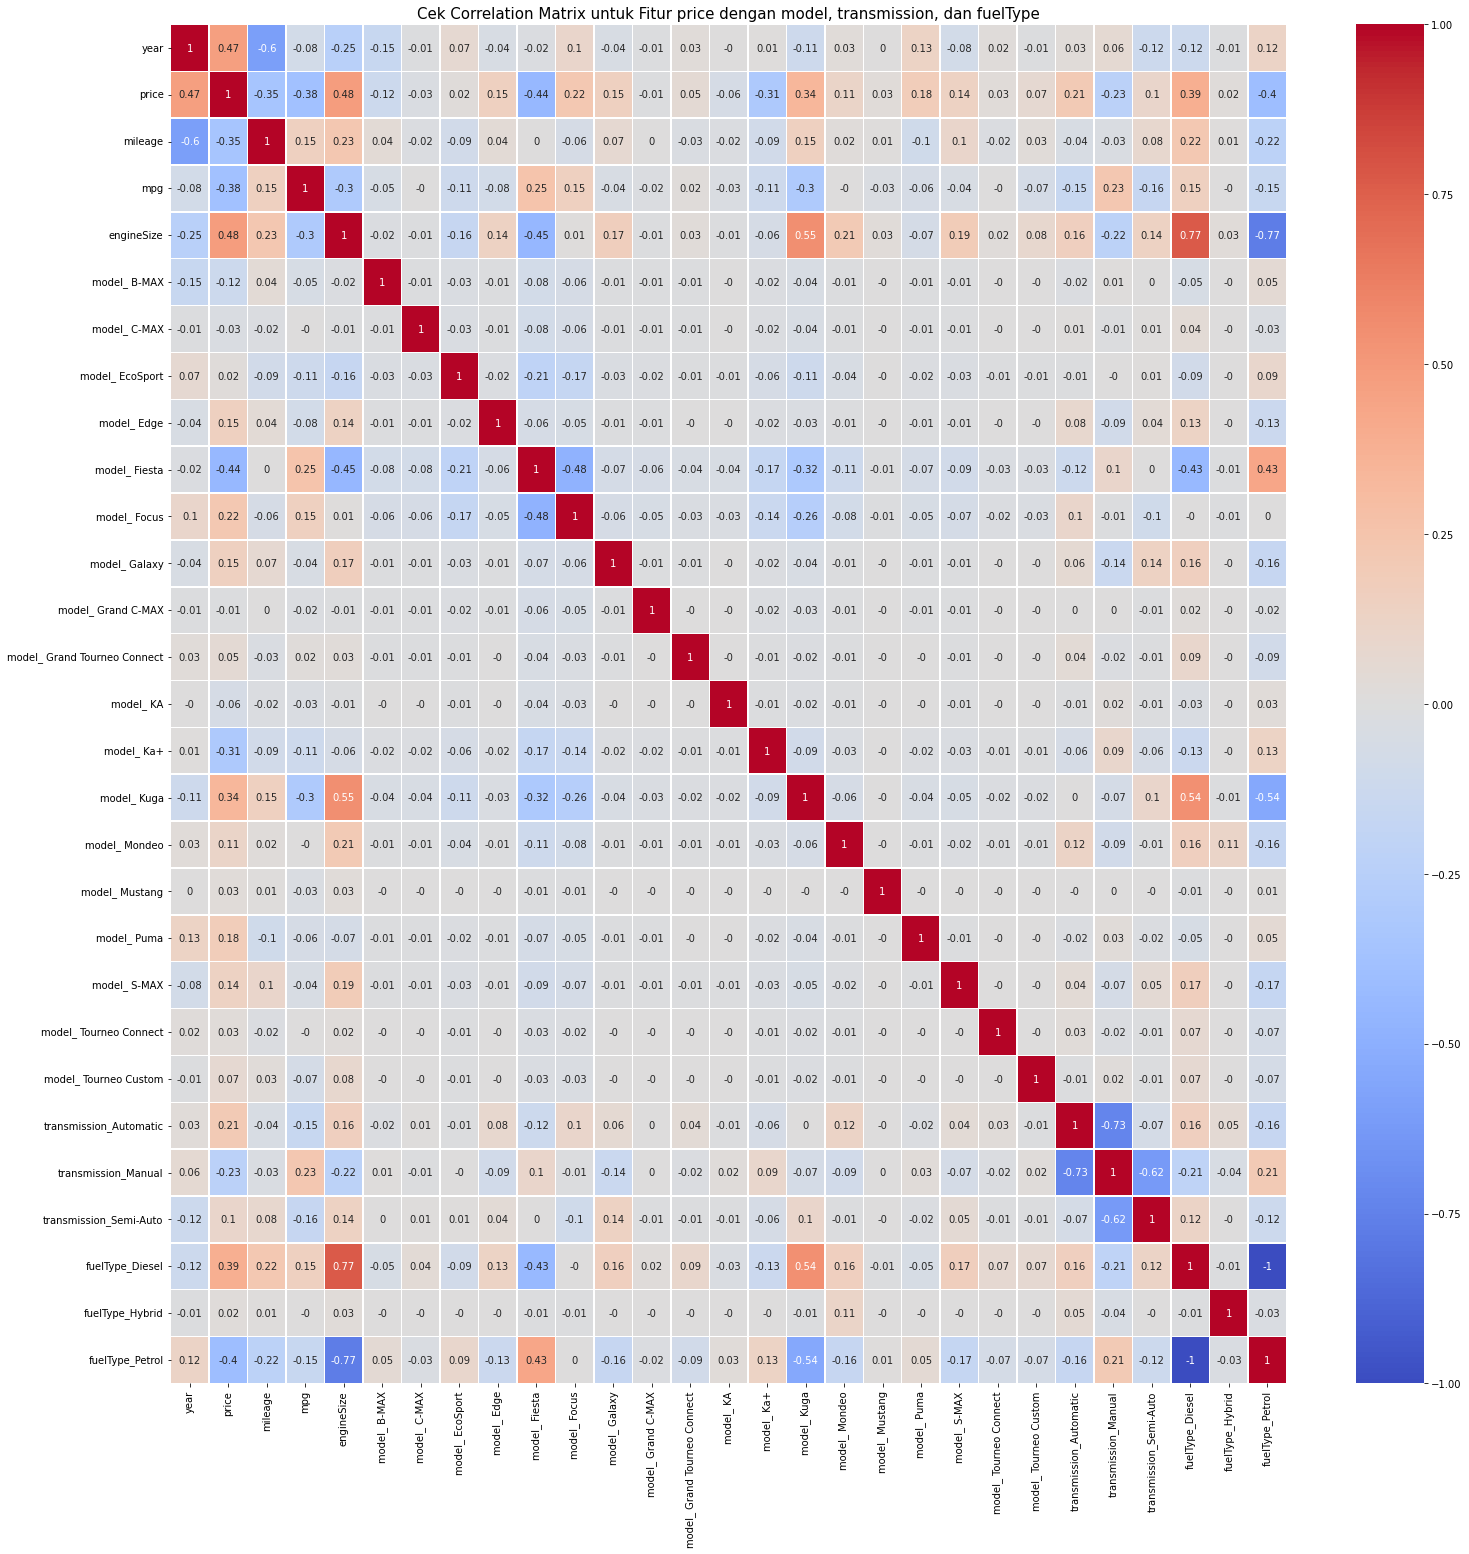

In [ ]:
plt.figure(figsize=(25, 25))
correlation_matrix = car.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Cek Correlation Matrix untuk Fitur price dengan model, transmission, dan fuelType", size=15)

###b# Reduksi Dimensi dengan PCA

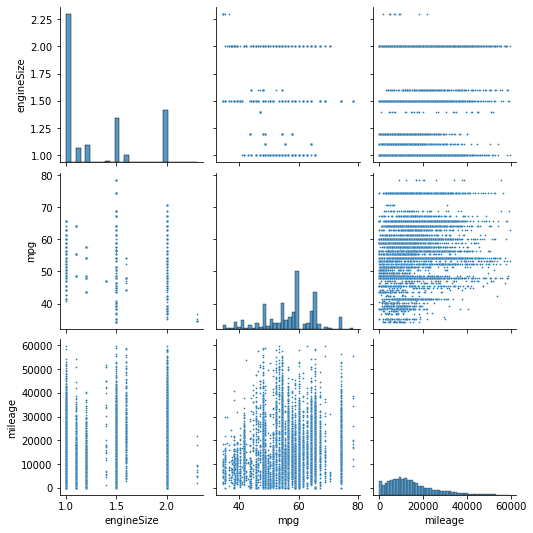

In [ ]:
sns.pairplot(car[['engineSize','mpg','mileage']], plot_kws={"s": 3});

In [ ]:
pca = PCA(n_components=3, random_state=123)
pca.fit(car[['engineSize','mpg','mileage']])
princ_comp = pca.transform(car[['engineSize','mpg','mileage']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(car[['engineSize','mpg','mileage']])
car['dimension'] = pca.transform(car.loc[:, ('engineSize','mpg','mileage')]).flatten()
car.drop(['engineSize','mpg','mileage'], axis=1, inplace=True)

car.head()

,year,price,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,model_ Focus,model_ Galaxy,model_ Grand C-MAX,...,model_ S-MAX,model_ Tourneo Connect,model_ Tourneo Custom,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,dimension
3,2019,17500,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,-4202.167248
4,2019,16500,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,-13180.166204
5,2015,10500,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,20769.833472
6,2019,22500,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,-12633.166008
7,2017,9000,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,-1608.165625


###c# Train-Test-Split

In [ ]:
X = car.drop(["price"],axis =1)
y = car["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 8401
Total # of sample in train dataset: 6720
Total # of sample in test dataset: 1681


###d# Standarisasi 

In [ ]:
numerical_features = ['year', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,dimension
1984,0.992321,-1.371358
14715,0.992321,0.030371
8506,0.992321,-0.109867
3148,-0.938029,1.131803
3675,0.027146,0.113673


In [ ]:
X_train[numerical_features].describe().round(4)

,year,dimension
count,6720.0000,6720.0000
mean,0.0000,-0.0000
std,1.0001,1.0001
min,-4.7987,-1.3719
25%,-0.9380,-0.7252
50%,0.0271,-0.2066
75%,0.9923,0.4982
max,1.9575,4.2096


##4# Model Development 

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

###a# dengan K-Nearest Neighbor

In [ ]:
# buat parameter untuk K- KN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### b# dengan Random Forest

In [ ]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### c# dengan Boosting Algorithm

In [ ]:
# buat parameter untuk boosting algorithm
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##5# Evaluasi Model

###a# Mengetahui *mean squared error* terbanyak dari ketiga algoritma

######yang mencapai mse terbanyak akan dipilih

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,2617.599334,3792.114025
RF,1271.62211,3857.129955
Boosting,6004.249221,6416.680764


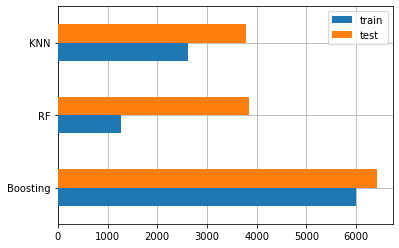

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

###b# Cek *mean square error* menggunakan *rmse* dan *mse*

In [ ]:
# Predict testing set
y_pred = boosting.predict(X_test)

In [ ]:
# cek mse
mse = mean_squared_error(y_test, y_pred)
print('Mean square error: ',mse)

# cek rmse
rmse = math.sqrt(mse)
print('Root mean square error: ',rmse)

Mean square error:  6416680.764073526
Root mean square error:  2533.1168082174036


###c# Cek akurasi menggunakan r2_score

In [ ]:
# Check performa model menggunakan r2_score
r2_score = r2_score(y_test, y_pred)
print('Akurasi dengan r2_score: ',r2_score)

Akurasi dengan r2_score:  0.5608183394358565


###d# Menguji prediksi dari data test

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4679,9750,9885.4,9994.6,11013.6
